In [243]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [244]:
df = pd.read_csv('/Users/rachyc/Downloads/churn_data.csv')

In [245]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [247]:
df.describe()

,Unnamed: 0,CustomerID,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,5000.50000,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,9999.00000,10000.00000,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


<Axes: xlabel='Churn', ylabel='Age'>

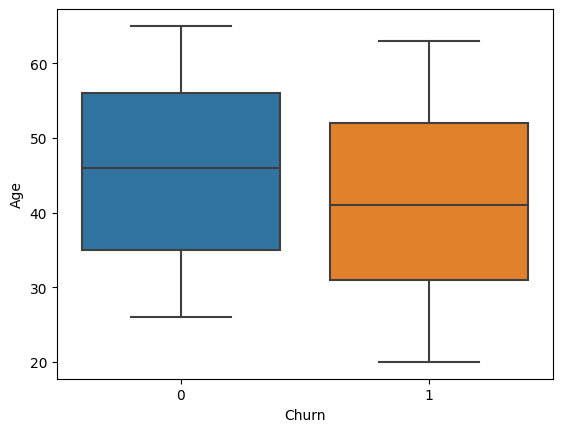

In [248]:
sns.boxplot(x='Churn', y='Age', data=df)

<Axes: xlabel='Location', ylabel='count'>

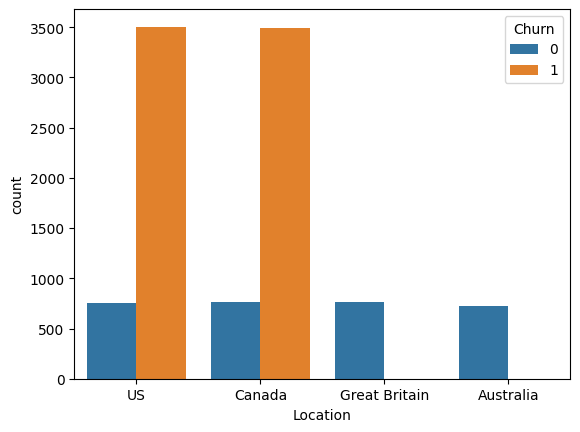

In [249]:
sns.countplot(x='Location', hue='Churn', data=df)


<Axes: xlabel='Device', ylabel='count'>

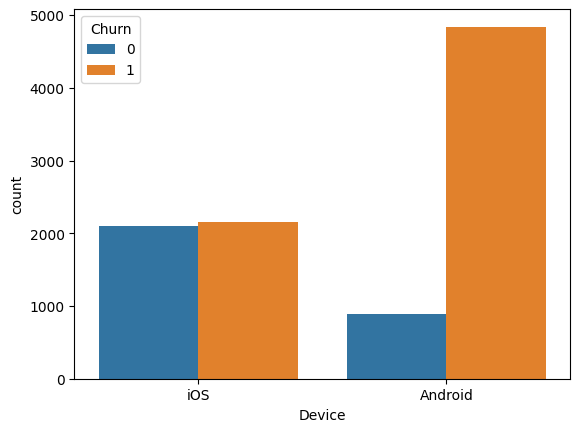

In [250]:
sns.countplot(x='Device', hue='Churn', data=df)

In [251]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [252]:
for col in ['Month_1_Spend','Month_2_Spend', 'Month_3_Spend', 'Month_4_Spend', 'Month_5_Spend', 'Month_6_Spend', 'Month_7_Spend', 
       'Month_8_Spend', 
       'Month_9_Spend', 
       'Month_10_Spend', 
       'Month_11_Spend', 
       'Month_12_Spend']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [254]:
df['yearly_items'] = df['Month_1_Items']+df['Month_2_Items']+df['Month_3_Items']+df['Month_4_Items']+df['Month_5_Items']+df['Month_6_Items']+df['Month_7_Items']+df['Month_8_Items']+df['Month_9_Items']+df['Month_10_Items']+df['Month_11_Items']+df['Month_12_Items']

In [255]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,yearly_items
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,60,0,700.181510,66,3,382.719682,59,0,1,758
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,89,1,571.331352,28,3,570.203975,89,0,1,704
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,60,5,198.222684,38,1,187.475764,79,5,1,757
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,59,3,565.395592,78,1,281.415092,63,4,1,855
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,85,1,574.382094,34,2,544.981985,28,2,1,673


In [256]:
df['yearly_spend'] = df['Month_1_Spend']+df['Month_2_Spend']+df['Month_3_Spend']+df['Month_4_Spend']+df['Month_5_Spend']+df['Month_6_Spend']+df['Month_7_Spend']+df['Month_8_Spend']+df['Month_9_Spend']+df['Month_10_Spend']+df['Month_11_Spend']+df['Month_12_Spend']

In [257]:
df['yearly_calls'] = df['Month_1_Support_Calls']+df['Month_2_Support_Calls']+df['Month_3_Support_Calls']+df['Month_4_Support_Calls']+df['Month_5_Support_Calls']+df['Month_6_Support_Calls']+df['Month_7_Support_Calls']+df['Month_8_Support_Calls']+df['Month_9_Support_Calls']+df['Month_10_Support_Calls']+df['Month_11_Support_Calls']+df['Month_12_Support_Calls']

In [258]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,yearly_items,yearly_spend,yearly_calls
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,700.181510,66,3,382.719682,59,0,1,758,6827.801568,23
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,571.331352,28,3,570.203975,89,0,1,704,5352.977440,22
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,198.222684,38,1,187.475764,79,5,1,757,5068.724122,32
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,565.395592,78,1,281.415092,63,4,1,855,5239.350565,26
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,574.382094,34,2,544.981985,28,2,1,673,5531.102731,20


<Axes: xlabel='Churn', ylabel='yearly_spend'>

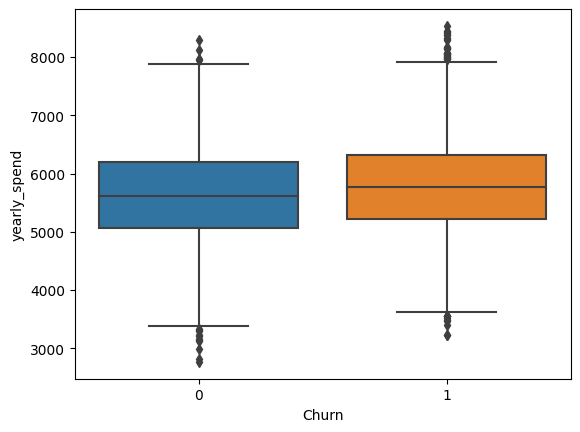

In [259]:
sns.boxplot(x='Churn', y='yearly_spend', data=df)

<Axes: xlabel='Churn', ylabel='yearly_items'>

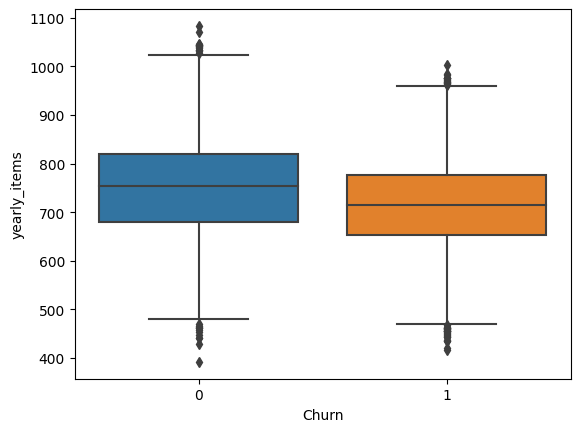

In [260]:
sns.boxplot(x='Churn', y='yearly_items', data=df)

<Axes: xlabel='Churn', ylabel='yearly_calls'>

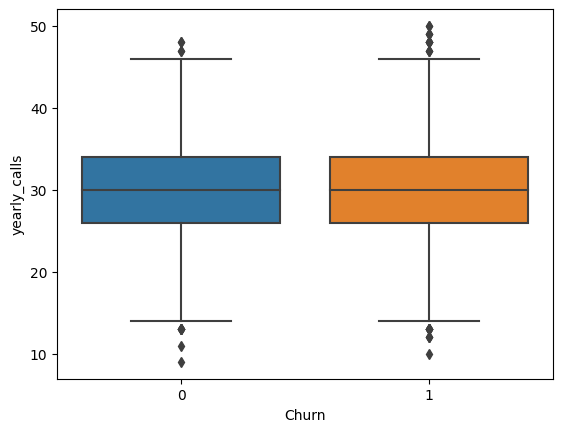

In [261]:
sns.boxplot(x='Churn', y='yearly_calls', data=df)

<Axes: xlabel='Churn', ylabel='yearly_calls'>

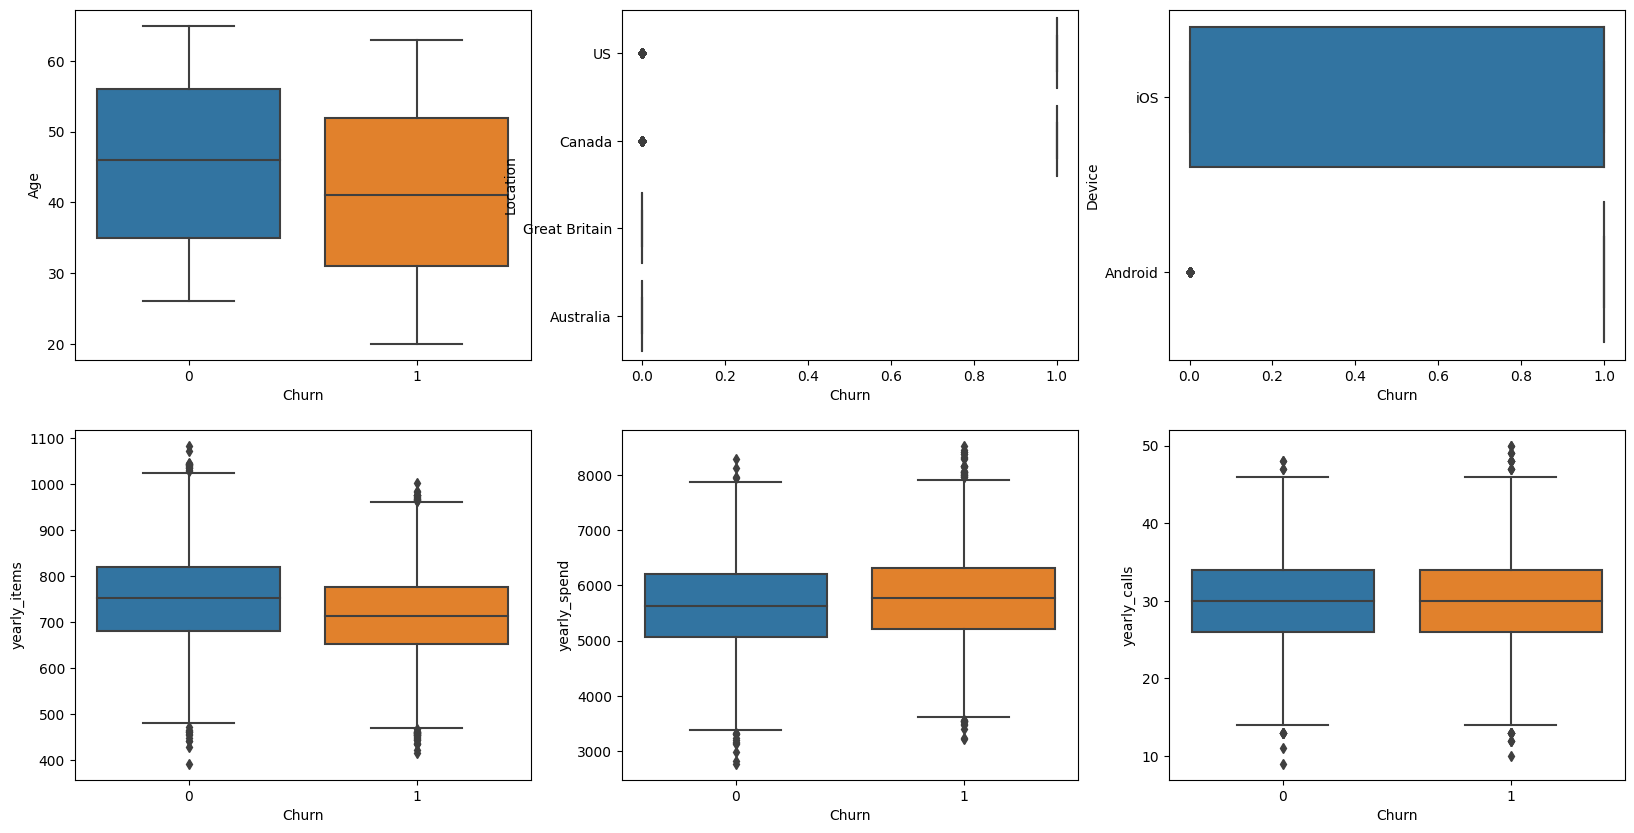

In [262]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Churn', y='Age', ax=ax1, data=df)
sns.boxplot(x='Churn', y='Location', ax=ax2, data=df)
sns.boxplot(x='Churn', y='Device', ax=ax3, data=df)
sns.boxplot(x='Churn', y='yearly_items', ax=ax4, data=df)
sns.boxplot(x='Churn', y='yearly_spend', ax=ax5, data=df)
sns.boxplot(x='Churn', y='yearly_calls', ax=ax6, data=df)

In [263]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn',
       'yearly_items', 'yearly_spend', 'yearly_calls'],
      dtype='object')

In [264]:
df_device = df.groupby(['Churn','Location'])[['Age']].count().unstack()

In [265]:
df_device

Age                              
Location Australia  Canada Great Britain      US
Churn                                           
0            725.0   763.0         762.0   750.0
1              NaN  3495.0           NaN  3505.0

In [266]:
df_device = df.groupby(['Churn','Device'])[['Age']].count().unstack()

In [267]:
df_device

Age      
Device Android   iOS
Churn               
0          896  2104
1         4840  2160

In [268]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn',
       'yearly_items', 'yearly_spend', 'yearly_calls'],
      dtype='object')

In [269]:
location_dummies = pd.get_dummies(df['Location'], dtype=int)

In [270]:
location_dummies.columns = ['A', 'C', 'G','U']

In [271]:
df = pd.concat([df, location_dummies], axis=1)

In [272]:
device_dummies = pd.get_dummies(df['Device'], dtype=int)

In [273]:
device_dummies.columns = ['Android', 'IOS']

In [274]:
df = pd.concat([df, device_dummies], axis=1)

In [275]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Churn,yearly_items,yearly_spend,yearly_calls,A,C,G,U,Android,IOS
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,1,758,6827.801568,23,0,0,0,1,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,1,704,5352.977440,22,0,0,0,1,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,1,757,5068.724122,32,0,1,0,0,1,0
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,1,855,5239.350565,26,0,0,0,1,0,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,1,673,5531.102731,20,0,0,0,1,0,1


In [276]:
#Logistic Regression

In [277]:
log = LogisticRegression()
log.fit(df[['Age','yearly_items', 'yearly_spend', 'yearly_calls','A','C','G','U','Android','IOS']], df['Churn'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [278]:
pred = log.predict(df[['Age','yearly_items', 'yearly_spend', 'yearly_calls','A','C','G','U','Android','IOS']])

In [279]:
print(accuracy_score(pred,df['Churn']))
print(f1_score(pred,df['Churn']))
print(precision_score(pred,df['Churn']))
print(recall_score(pred,df['Churn']))

0.8545
0.9044460497799962
0.9837142857142858
0.8370001215509907


In [280]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,Age,-0.02466
1,yearly_items,-0.004044
2,yearly_spend,0.000224
3,yearly_calls,0.00937
4,A,-3.165571
5,C,3.308596
6,G,-3.344324
7,U,3.578302
8,Android,1.0255
9,IOS,-0.648496


In [281]:
x = df[['Age','yearly_items', 'A','C','G','U','Android','IOS']]
y = df['Churn']

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [283]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')

In [284]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [285]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [286]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))

0.8169934640522876
0.911869918699187
0.9115863389722312
0.9115863389722312


In [287]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


In [288]:
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


logistic_model = LogisticRegression(random_state=42)


logistic_ram = RandomizedSearchCV(logistic_model, logistic_params, cv=5)
logistic_ram.fit(x_train, y_train)

# Best parameters and score
best_logistic_params = logistic_ram.best_params_
best_logistic_score = logistic_ram.best_score_

best_logistic_params, best_logistic_score

({'solver': 'liblinear', 'penalty': 'l2', 'C': 100}, 0.850375)

In [289]:
log_pred_prob = log.predict_proba(x_test)

In [290]:
fpr, tpr, tresholds = roc_curve(y_test,log_pred_prob[:,1])

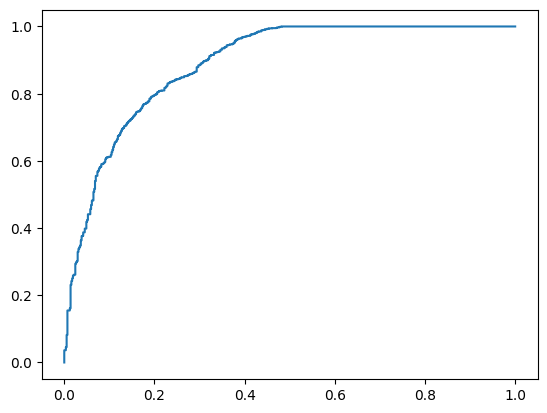

In [291]:
plt.plot(fpr,tpr)

In [292]:
gmeans = np.sqrt(tpr*(1-fpr))

In [293]:
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.7007985000648502
0.8002017947878748


In [294]:
tresholds

array([1.98047527e+00, 9.80475267e-01, 9.62784803e-01, 9.62691555e-01,
       9.61961123e-01, 9.61652754e-01, 9.59171514e-01, 9.59112771e-01,
       9.52670790e-01, 9.52444093e-01, 9.49339740e-01, 9.49101742e-01,
       9.46378894e-01, 9.46376898e-01, 9.46006460e-01, 9.45949291e-01,
       9.42339151e-01, 9.41988412e-01, 9.41595080e-01, 9.41558791e-01,
       9.40539746e-01, 9.40418909e-01, 9.40221522e-01, 9.40213637e-01,
       9.33883524e-01, 9.33858910e-01, 9.33467633e-01, 9.33370720e-01,
       9.32896853e-01, 9.32809208e-01, 9.32148459e-01, 9.31958599e-01,
       9.31462615e-01, 9.31448635e-01, 9.30990250e-01, 9.30949209e-01,
       9.30518778e-01, 9.30357070e-01, 9.28241591e-01, 9.28228222e-01,
       9.26725196e-01, 9.26519923e-01, 9.25750172e-01, 9.25719872e-01,
       9.25361794e-01, 9.25154468e-01, 9.23514680e-01, 9.23504771e-01,
       9.22473314e-01, 9.22423308e-01, 9.21129050e-01, 9.21034678e-01,
       9.20369218e-01, 9.20226942e-01, 9.18947050e-01, 9.18848725e-01,
      

In [295]:
gmeans

array([0.        , 0.02646281, 0.16944464, 0.17352822, 0.19082601,
       0.19049211, 0.21297665, 0.21278974, 0.2854874 , 0.28523642,
       0.31534073, 0.31753825, 0.34784573, 0.34983913, 0.35182124,
       0.35379224, 0.39201997, 0.39098333, 0.39886509, 0.39851195,
       0.40793029, 0.40961945, 0.41130167, 0.41297704, 0.47734723,
       0.47692386, 0.4819556 , 0.48338362, 0.4883488 , 0.48791491,
       0.4956101 , 0.495862  , 0.50342235, 0.50297347, 0.50569227,
       0.50478844, 0.50816047, 0.50950304, 0.52208526, 0.52339211,
       0.53564817, 0.53516798, 0.53897706, 0.53849302, 0.54164397,
       0.54115666, 0.5541835 , 0.55540822, 0.5651104 , 0.56460107,
       0.57235612, 0.57183932, 0.57596818, 0.57544717, 0.57954293,
       0.57901775, 0.5801816 , 0.58134313, 0.59169427, 0.59115709,
       0.601321  , 0.60077409, 0.60133321, 0.6007853 , 0.60134339,
       0.60245802, 0.60910298, 0.60799047, 0.61509531, 0.6161811 ,
       0.61672327, 0.61559271, 0.6310851 , 0.63050479, 0.63470

In [296]:
y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.7007985000648502:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [297]:
print(f1_score(y_pred_new,y_test))

0.8641165755919854


In [298]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

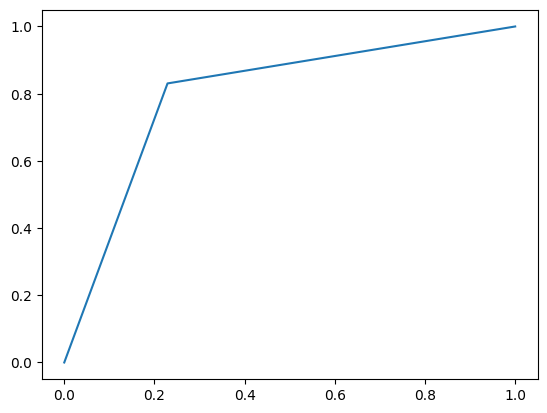

In [299]:
plt.plot(fpr,tpr)

1. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
2. Your approach for building and evaluating the model. 
3. The final model you selected and how you know this is the best model for the problem.
4. How the model should be used by the business, in business process.